In [208]:
from __future__ import print_function

import tensorflow as tf
import numpy

In [209]:
tf.reset_default_graph()

# Constant define

In [218]:
EPOCHES = 100
DISPLAY_STEP = 10
learning_rate = 0.01

# Generate dataset

In [219]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [220]:
print(X_data.shape)
print(y_data.shape)
print(type(X_data))
print(type(y_data))

(17,)
(17,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Construct Network

In [221]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Start training

Epoch: 0050 cost= 0.077248141 W= 0.25878862 b= 0.73531795
Epoch: 0100 cost= 0.077217653 W= 0.25824162 b= 0.7392534
Epoch: 0150 cost= 0.077190764 W= 0.25772724 b= 0.74295336
Epoch: 0200 cost= 0.077166975 W= 0.2572433 b= 0.7464349
Epoch: 0250 cost= 0.077146016 W= 0.25678828 b= 0.7497082
Epoch: 0300 cost= 0.077127494 W= 0.25636032 b= 0.7527875
Epoch: 0350 cost= 0.077111147 W= 0.2559578 b= 0.75568265
Epoch: 0400 cost= 0.077096716 W= 0.25557905 b= 0.7584076
Epoch: 0450 cost= 0.077083983 W= 0.25522298 b= 0.76096904
Epoch: 0500 cost= 0.077072740 W= 0.2548881 b= 0.76337856
Epoch: 0550 cost= 0.077062838 W= 0.25457287 b= 0.7656456
Epoch: 0600 cost= 0.077054098 W= 0.25427675 b= 0.7677762
Epoch: 0650 cost= 0.077046394 W= 0.25399798 b= 0.7697812
Epoch: 0700 cost= 0.077039607 W= 0.2537357 b= 0.77166796
Epoch: 0750 cost= 0.077033602 W= 0.25348932 b= 0.77344096
Epoch: 0800 cost= 0.077028342 W= 0.25325763 b= 0.77510774
Epoch: 0850 cost= 0.077023692 W= 0.25303957 b= 0.7766769
Epoch: 0900 cost= 0.0770195

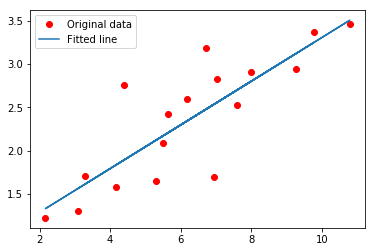

Testing... (Mean square loss Comparison)
Testing cost= 0.07856725
Absolute mean square loss difference: 0.0015544221


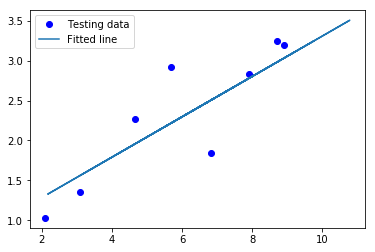

In [222]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()